# Data604 - Final Project
##    Virus Simulation with Dash, Simpy and Pygame

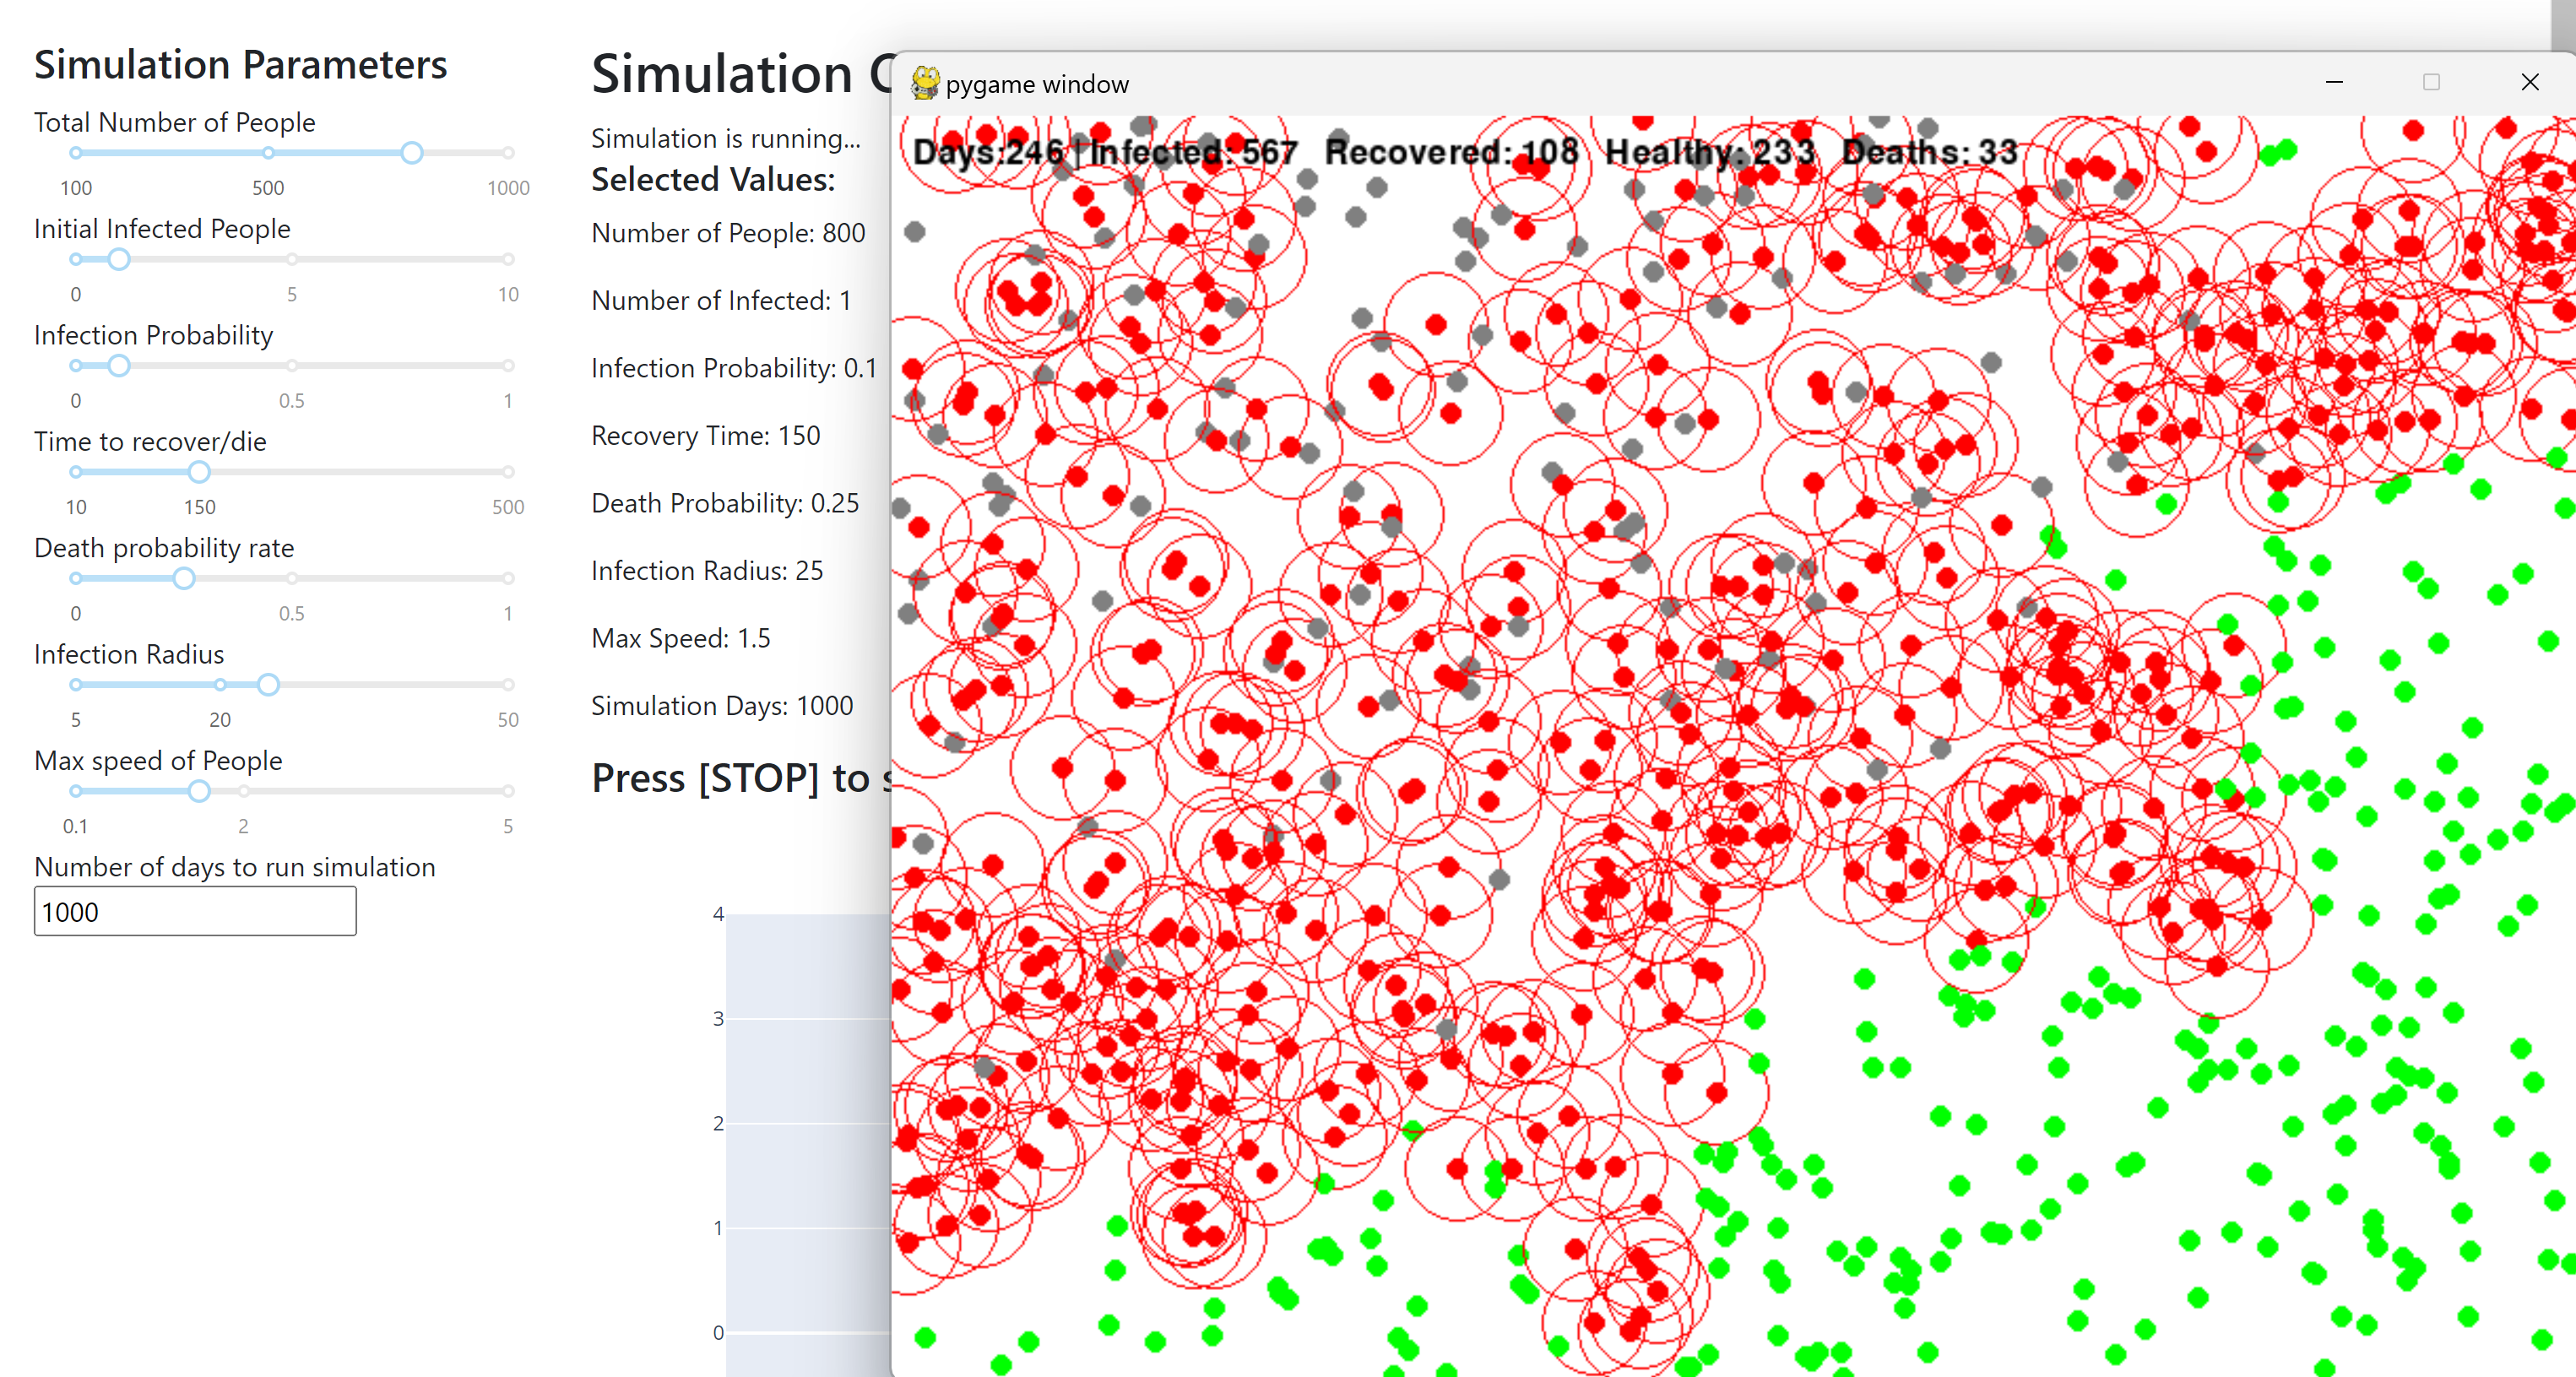

## Problem Statement And Relevance

The problem at hand is to simulate virus contagion and mortality using Python and Simpy.  To add to the experience and make the application much more interactive and visually appealing, the simulation was embedded within a DASH app, which allows the user adjust all the simulation parameters.  The visualization is done through a PyGame window which shows people as dots and how they get infected, survive or die.  

With the ongoing global health crisis caused by infectious diseases, such as the COVID-19 pandemic, understanding the dynamics of virus spread and its impact on mortality rates is of utmost importance. Simulating virus contagion and mortality allows researchers, policymakers, and healthcare professionals to gain valuable insights into the behavior of the virus, assess the effectiveness of intervention strategies, and make informed decisions to mitigate its impact on public health.

### Relevance:
1. Public Health Preparedness: The simulation of virus contagion and mortality provides a valuable tool for assessing the preparedness of public health systems. By modeling different scenarios, researchers and policymakers can evaluate the potential impact of an outbreak and identify strategies to improve healthcare response, resource allocation, and containment measures.


2. Intervention Strategy Evaluation: Simulations enable the evaluation of various intervention strategies to control virus spread and minimize mortality rates. By modifying parameters such as social distancing measures, vaccination coverage, or the availability of healthcare resources, the simulation can provide insights into the effectiveness of different approaches and guide decision-making to optimize resource allocation and intervention planning.


3. Policy Decision Support: Governments and policymakers rely on accurate information to implement evidence-based policies during disease outbreaks. Simulating virus contagion and mortality allows policymakers to understand the potential consequences of different policy decisions, such as lockdowns, travel restrictions, or vaccination campaigns. By analyzing the simulation results, policymakers can make informed choices to balance public health considerations with socio-economic impacts.


4. Epidemiological Research: Simulations provide a valuable tool for epidemiological research, allowing scientists to explore the dynamics of virus spread and mortality in controlled environments. By incorporating real-world data and considering factors such as population density, mobility patterns, and individual behaviors, researchers can refine models and gain a deeper understanding of the underlying mechanisms driving virus transmission and mortality.


5. Public Health Education: Simulations can serve as educational tools to raise public awareness about virus contagion and mortality. Through interactive visualizations and scenarios, the general population can gain a better understanding of the importance of preventive measures, such as vaccination, hygiene practices, and adherence to public health guidelines. This increased awareness can contribute to a more informed and proactive approach to public health.


In summary, simulating virus contagion and mortality using Python offers a powerful and versatile approach to studying infectious diseases. It provides crucial insights into virus dynamics, helps evaluate intervention strategies, supports policy decision-making, advances epidemiological research, and promotes public health education. By developing accurate and realistic simulations, we can contribute to a better understanding of virus behavior and improve our ability to respond effectively to future outbreaks.


## Model Flowchart


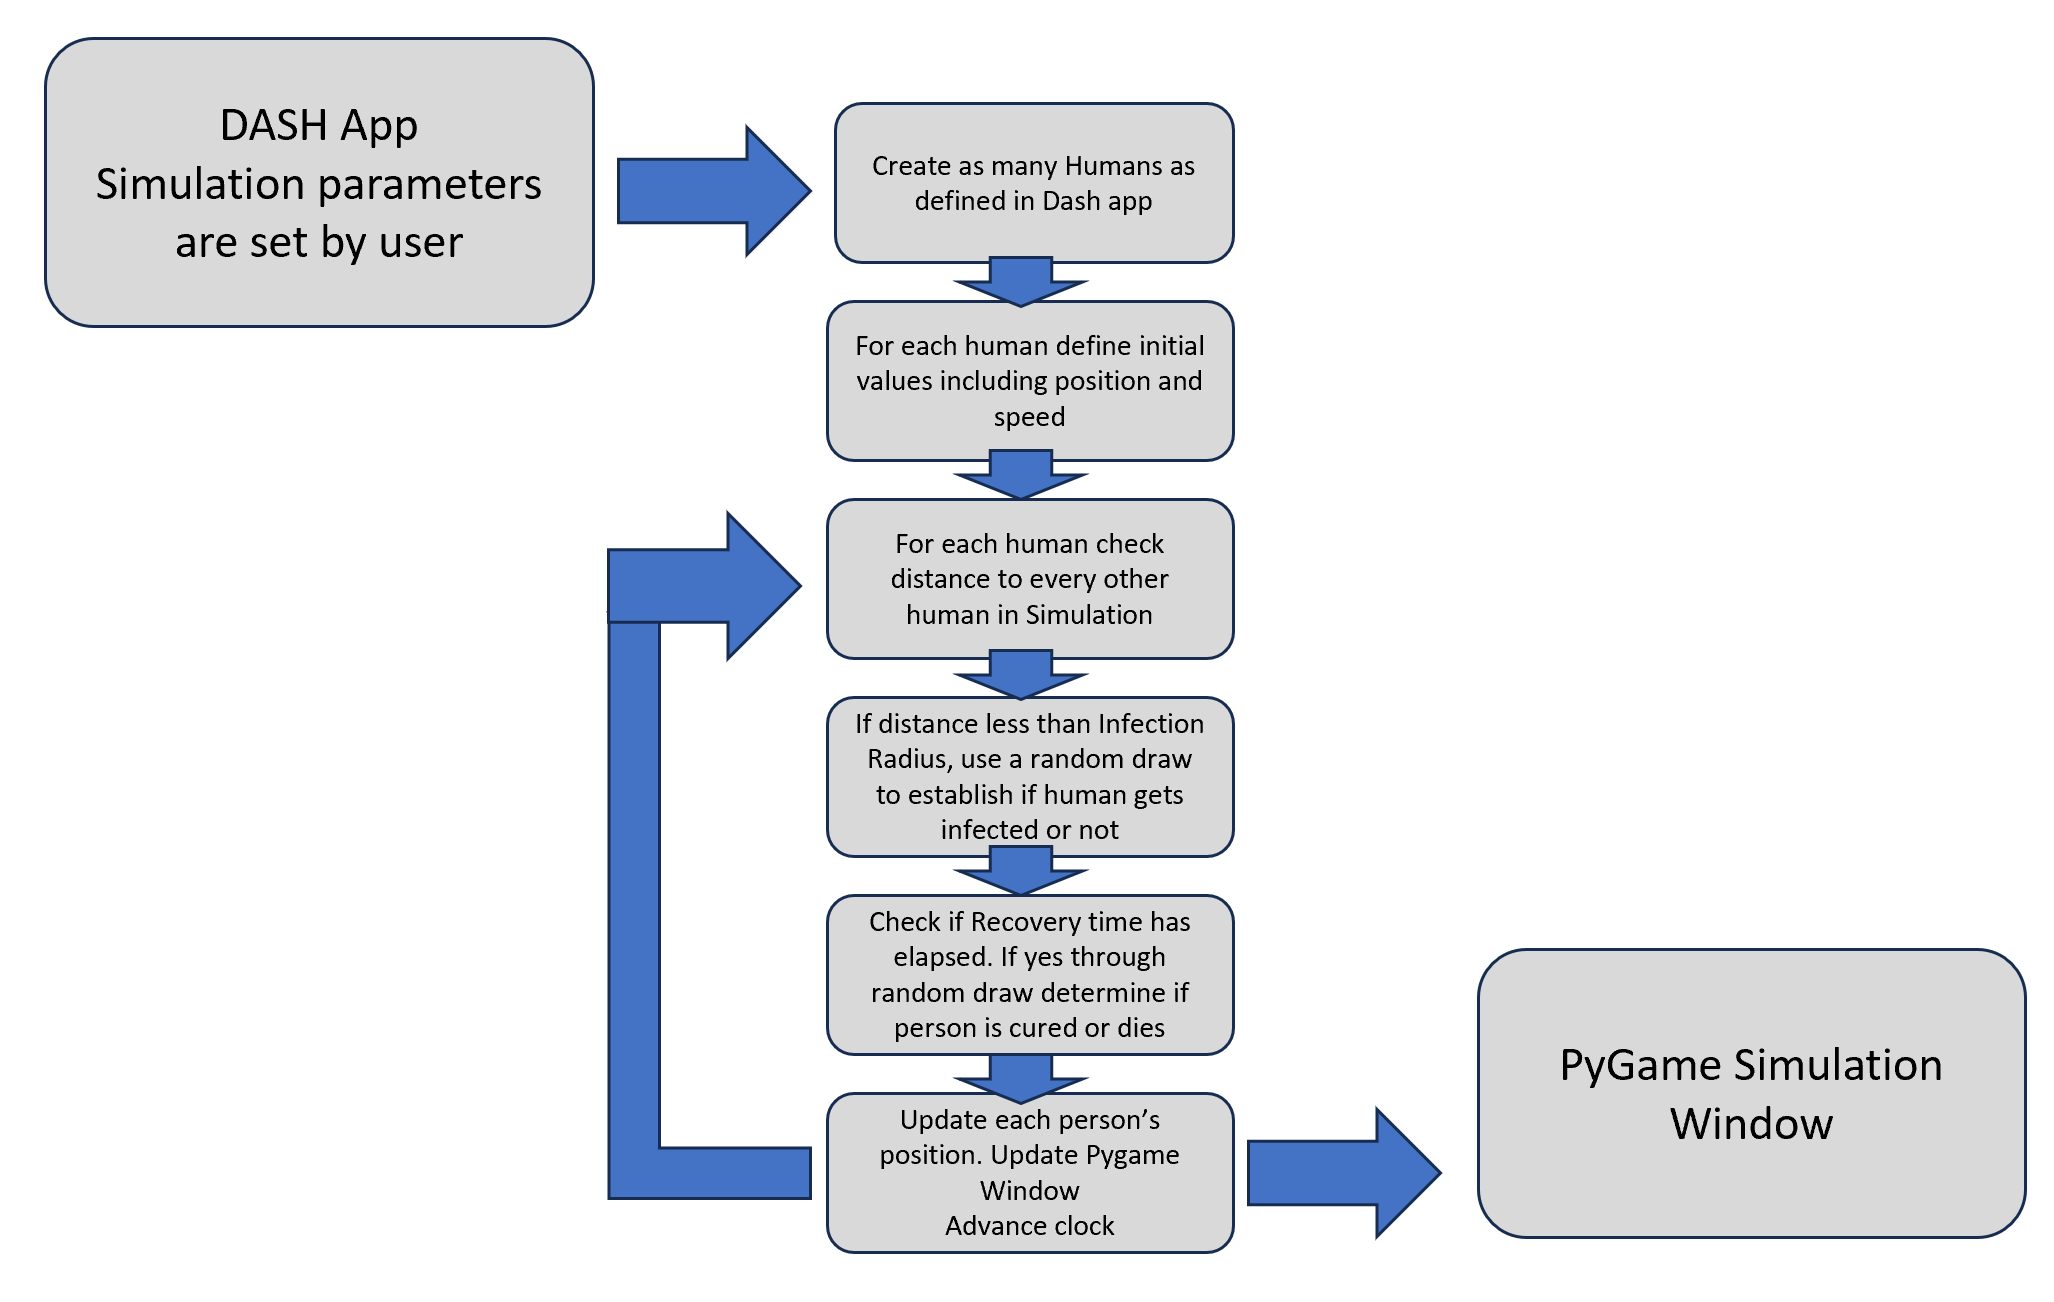

##  Simulate the process for the appropriate number of iterations (justify)

Due to the many parameters this was not the type of simulation you define a set of number of days to run. Instead part of its functionality was for the user to try the different parameters and see what would happen.

Instead the user would endup setting the simulation days up the point where everyone that was infected either survived (turns color grey) or dies (dissappears from the simulation). At this point the simulation was not doing anything interesting anymore as all dots were either grey or green.  Depending the parameters settings this could be achieved in 100 days or 3000 days.

##  Justify the validity of the model and discuss how you verified it

Verification was extremely challenging since the contact rate is not a explicity parameter of the app. People contact other depending on the size of the overall window, number of humans in the window and each person's speed. At first I was inclined to use the text epidimiology equations to see if I could that, but the task became much more difficult that initially thought so it was dropped.

Instead what I did is that I did a table of parameter combinations I wanted to test and wrote beforee hand what I expected would happend based on my intuition built through the covid pandemic. I ran simulation and compare the final results to what if saw in the simulation

## State  your conclusions/ findings from the model

Conclusion:
Through this simulation, we can gain insights into the dynamics of virus spread, assess the impact on mortality rates, and evaluate intervention strategies to mitigate the consequences. The relevance of this simulation lies in its potential to enhance public health preparedness, support policy decision-making, advance epidemiological research, and promote public health education.

Findings:
1. Dynamics of Virus Spread: The simulation reveals the complex nature of virus transmission, highlighting the role of various factors such as population density, mobility patterns, and individual behaviors. It demonstrates how viruses can spread rapidly within communities and highlights the importance of early intervention to control the contagion.

2. Impact on Mortality Rates: The simulation provides a means to estimate and analyze mortality rates associated with the virus. By considering factors such as age, pre-existing health conditions, and access to healthcare, the simulation helps identify vulnerable populations and assess the potential burden on healthcare systems.

3. Intervention Strategy Evaluation: Through the simulation, different intervention strategies can be tested and evaluated. By modifying parameters such as population density, movement speed, recovery times, infection radius and rate, researchers can quantify the effectiveness of various interventions in controlling virus spread and reducing mortality rates.


4. Some more specific findings:
- Even if the stated probability of contagion from an infected person seems low, people ten to have many contacts with other people, thus even if probability is low, we found people would get infected eventually


- Best mechanism to control the spread is to reduce contact rate by:

     a) Reduce movement speed (how much we move around the environment: city, state, country, world

     b) Reduce population density. The more spread people are the fewer contacts people will have
     
     c) Make recovery faster, thus avoiding infected people contact others for longer time


In summary, the simulation of virus contagion and mortality yields valuable findings that enhance our understanding of infectious diseases. By utilizing this tool effectively, we can improve public health preparedness, support evidence-based policies, advance epidemiological research, and educate the public. These findings contribute to our collective ability to combat current and future outbreaks effectively, ultimately safeguarding public health and saving lives.



## Generate appropriate graphs

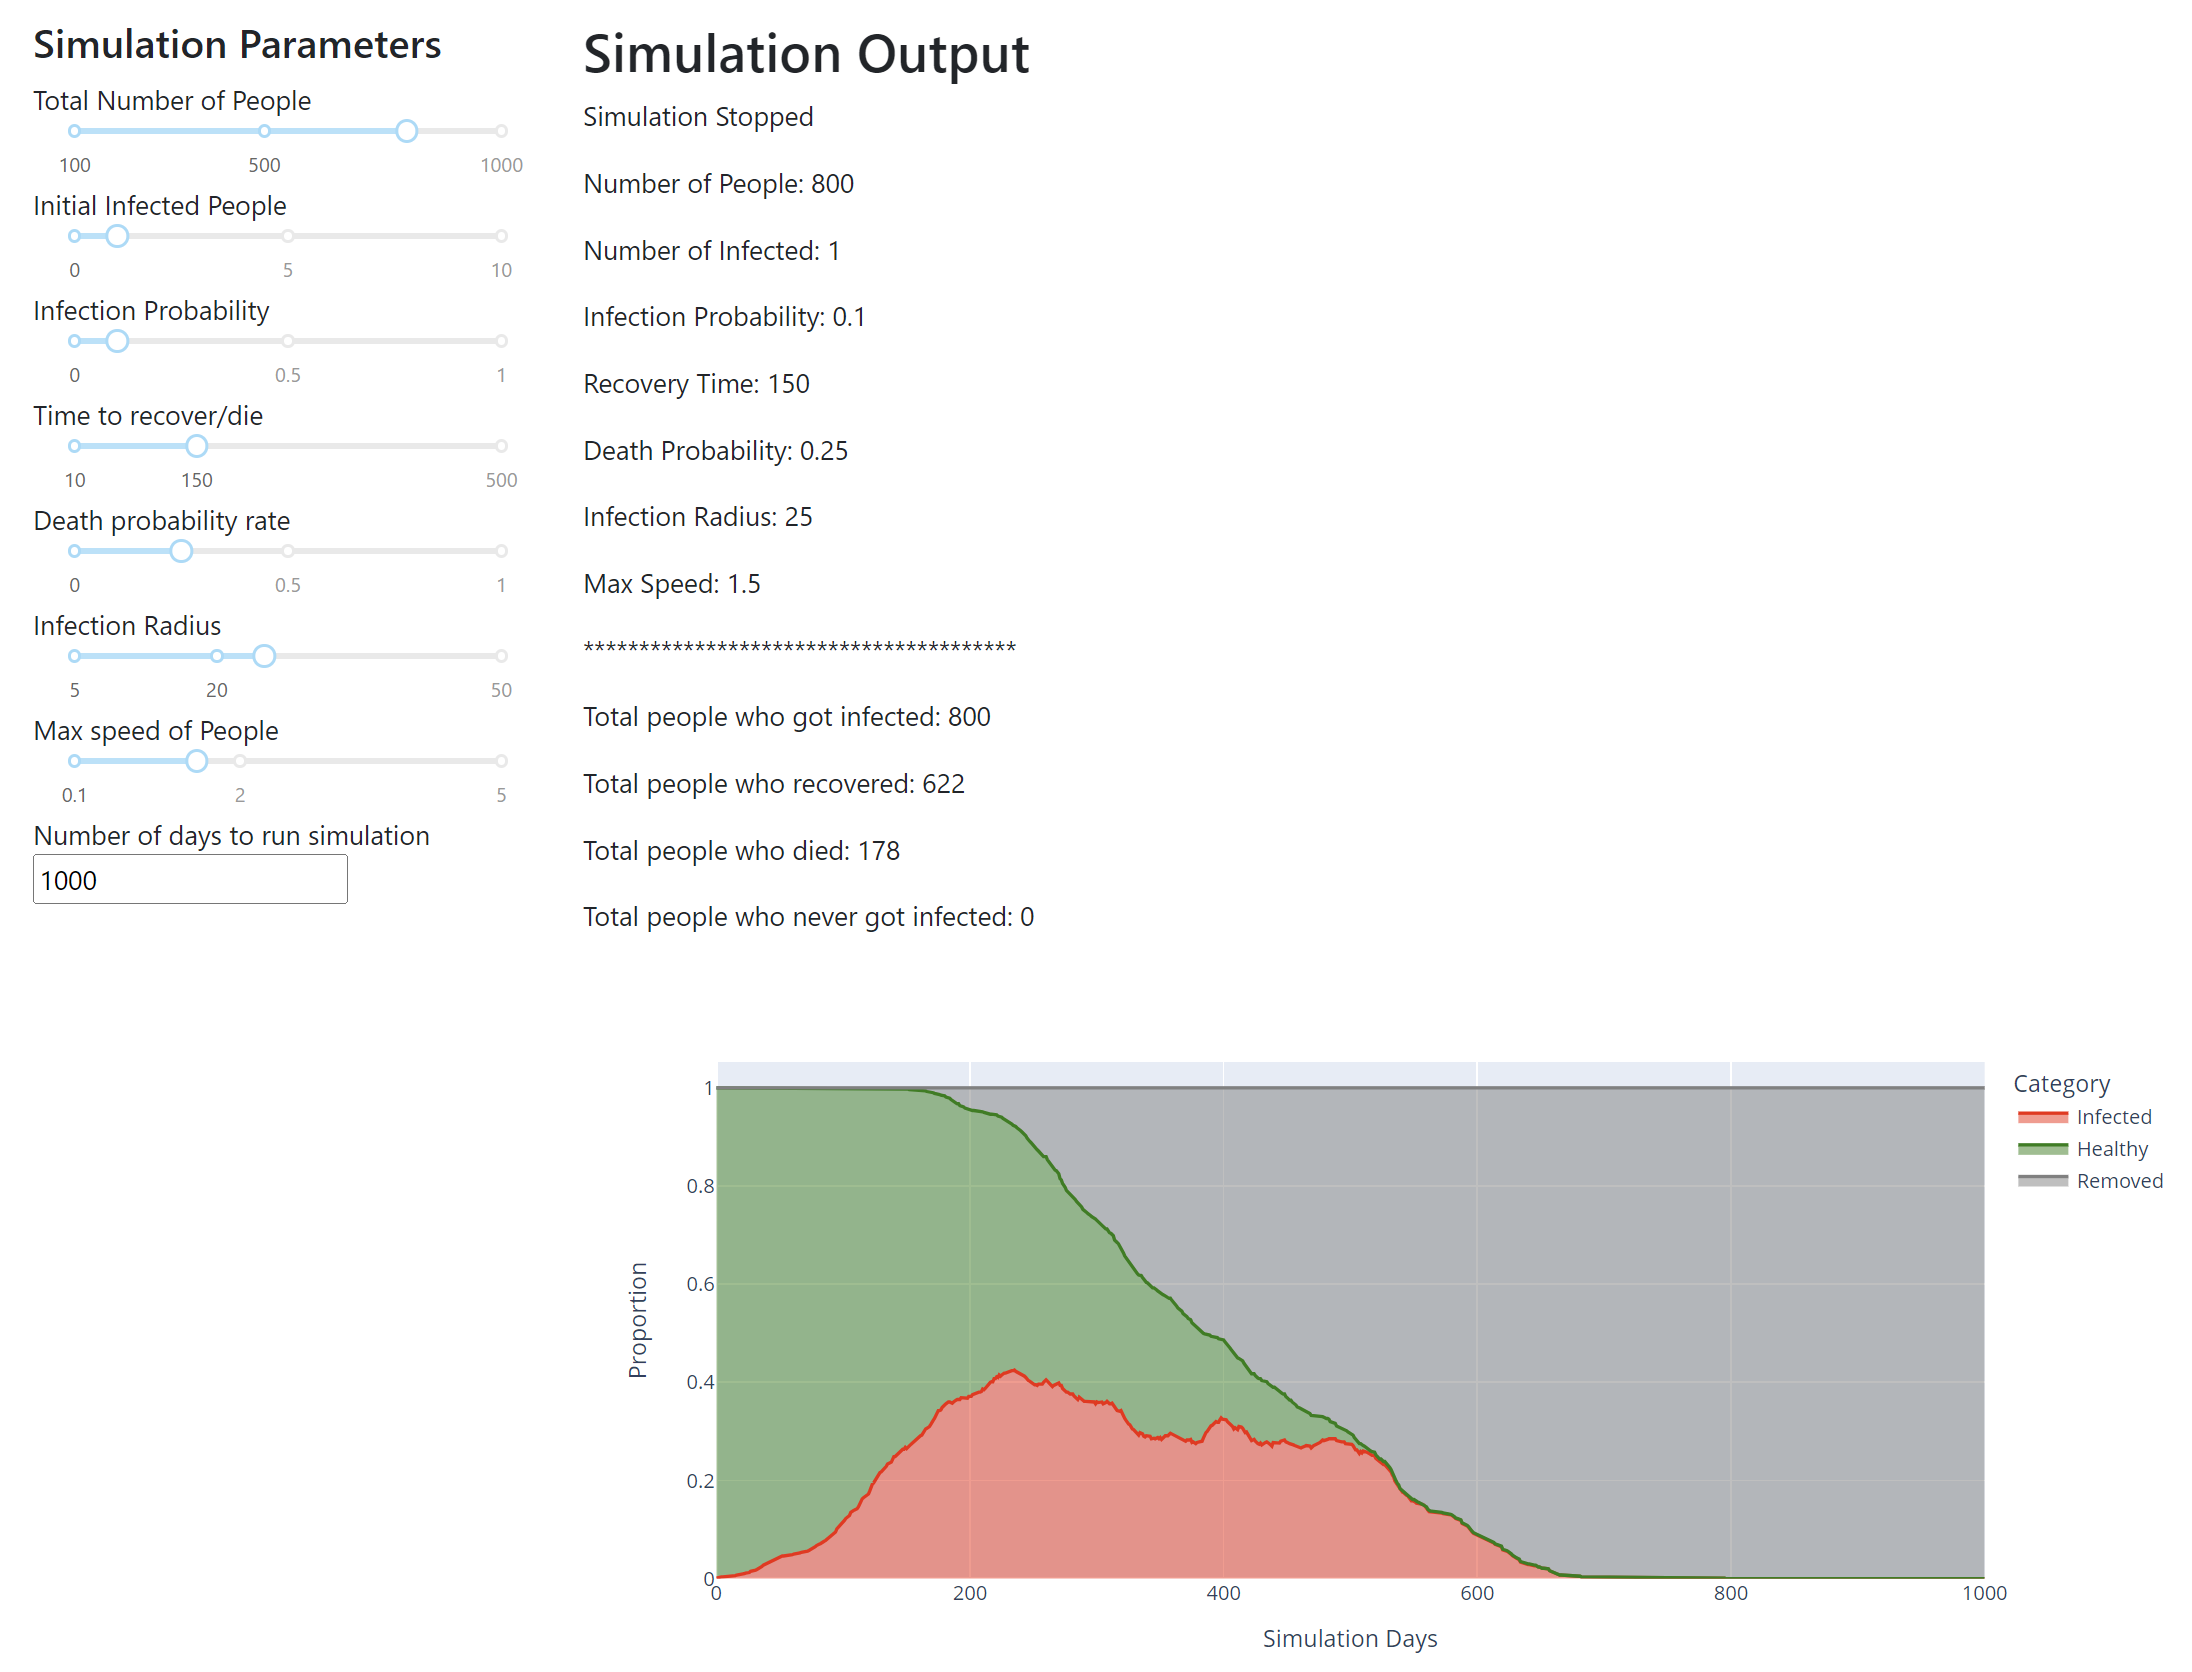
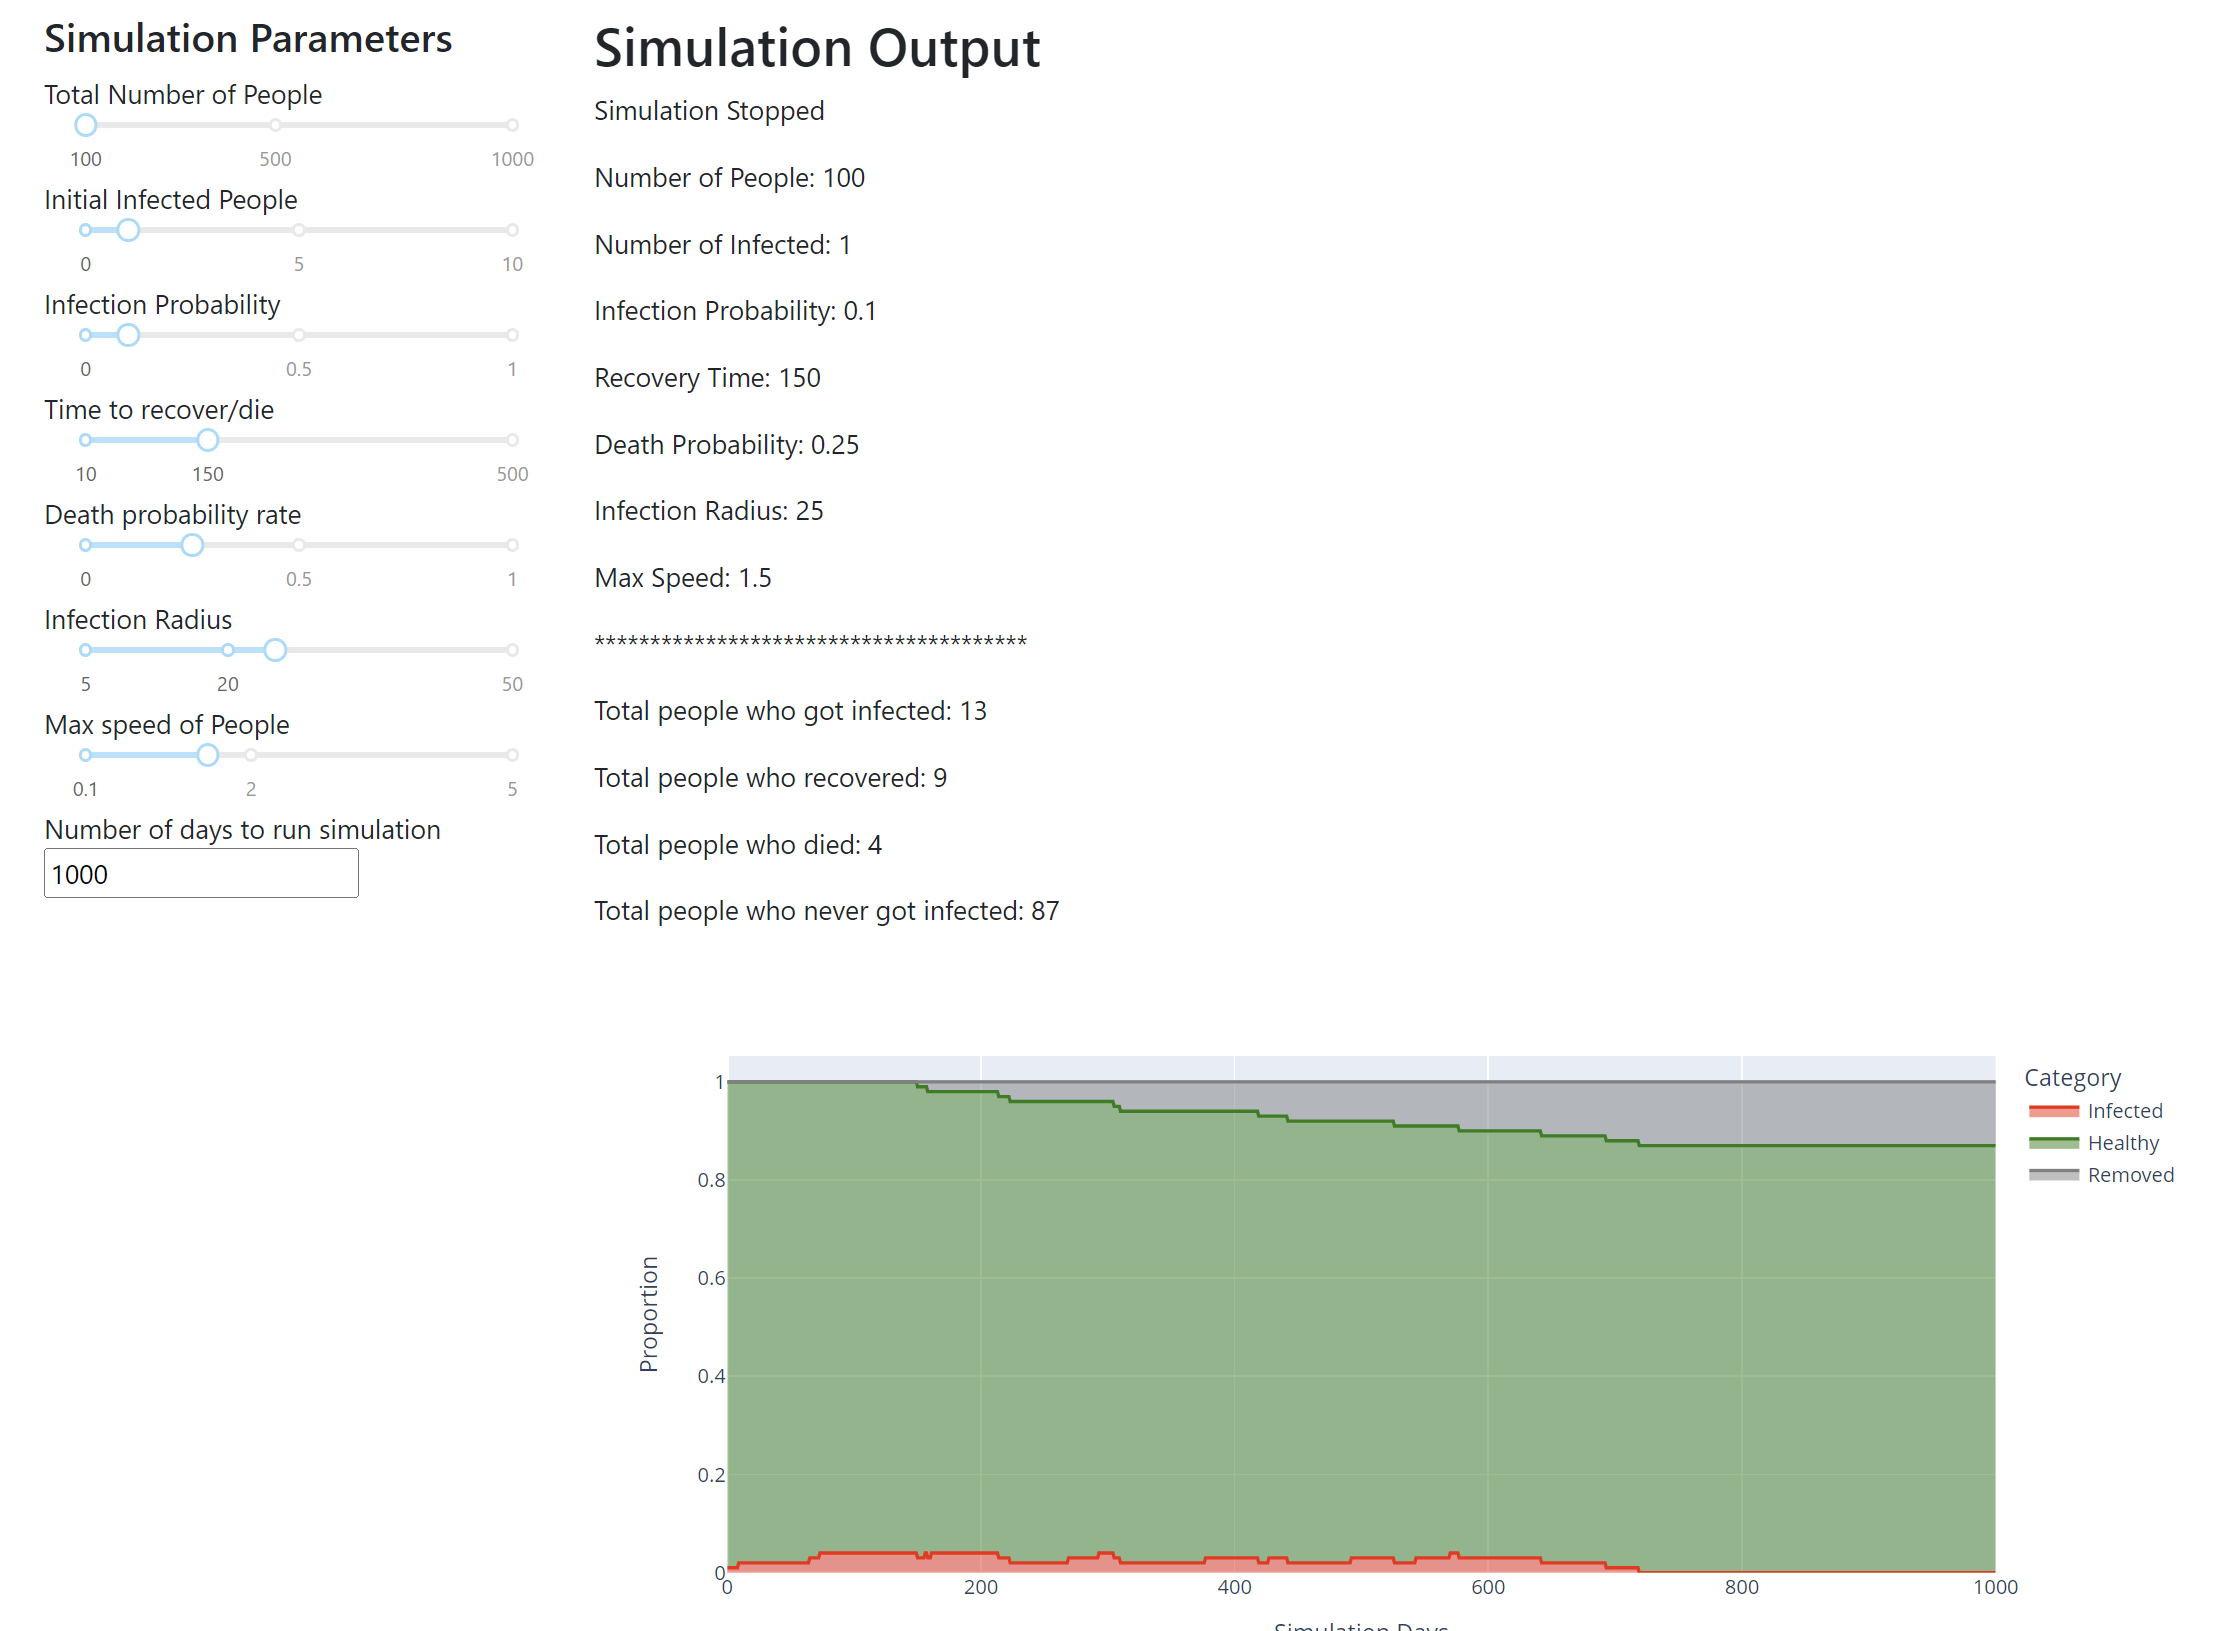
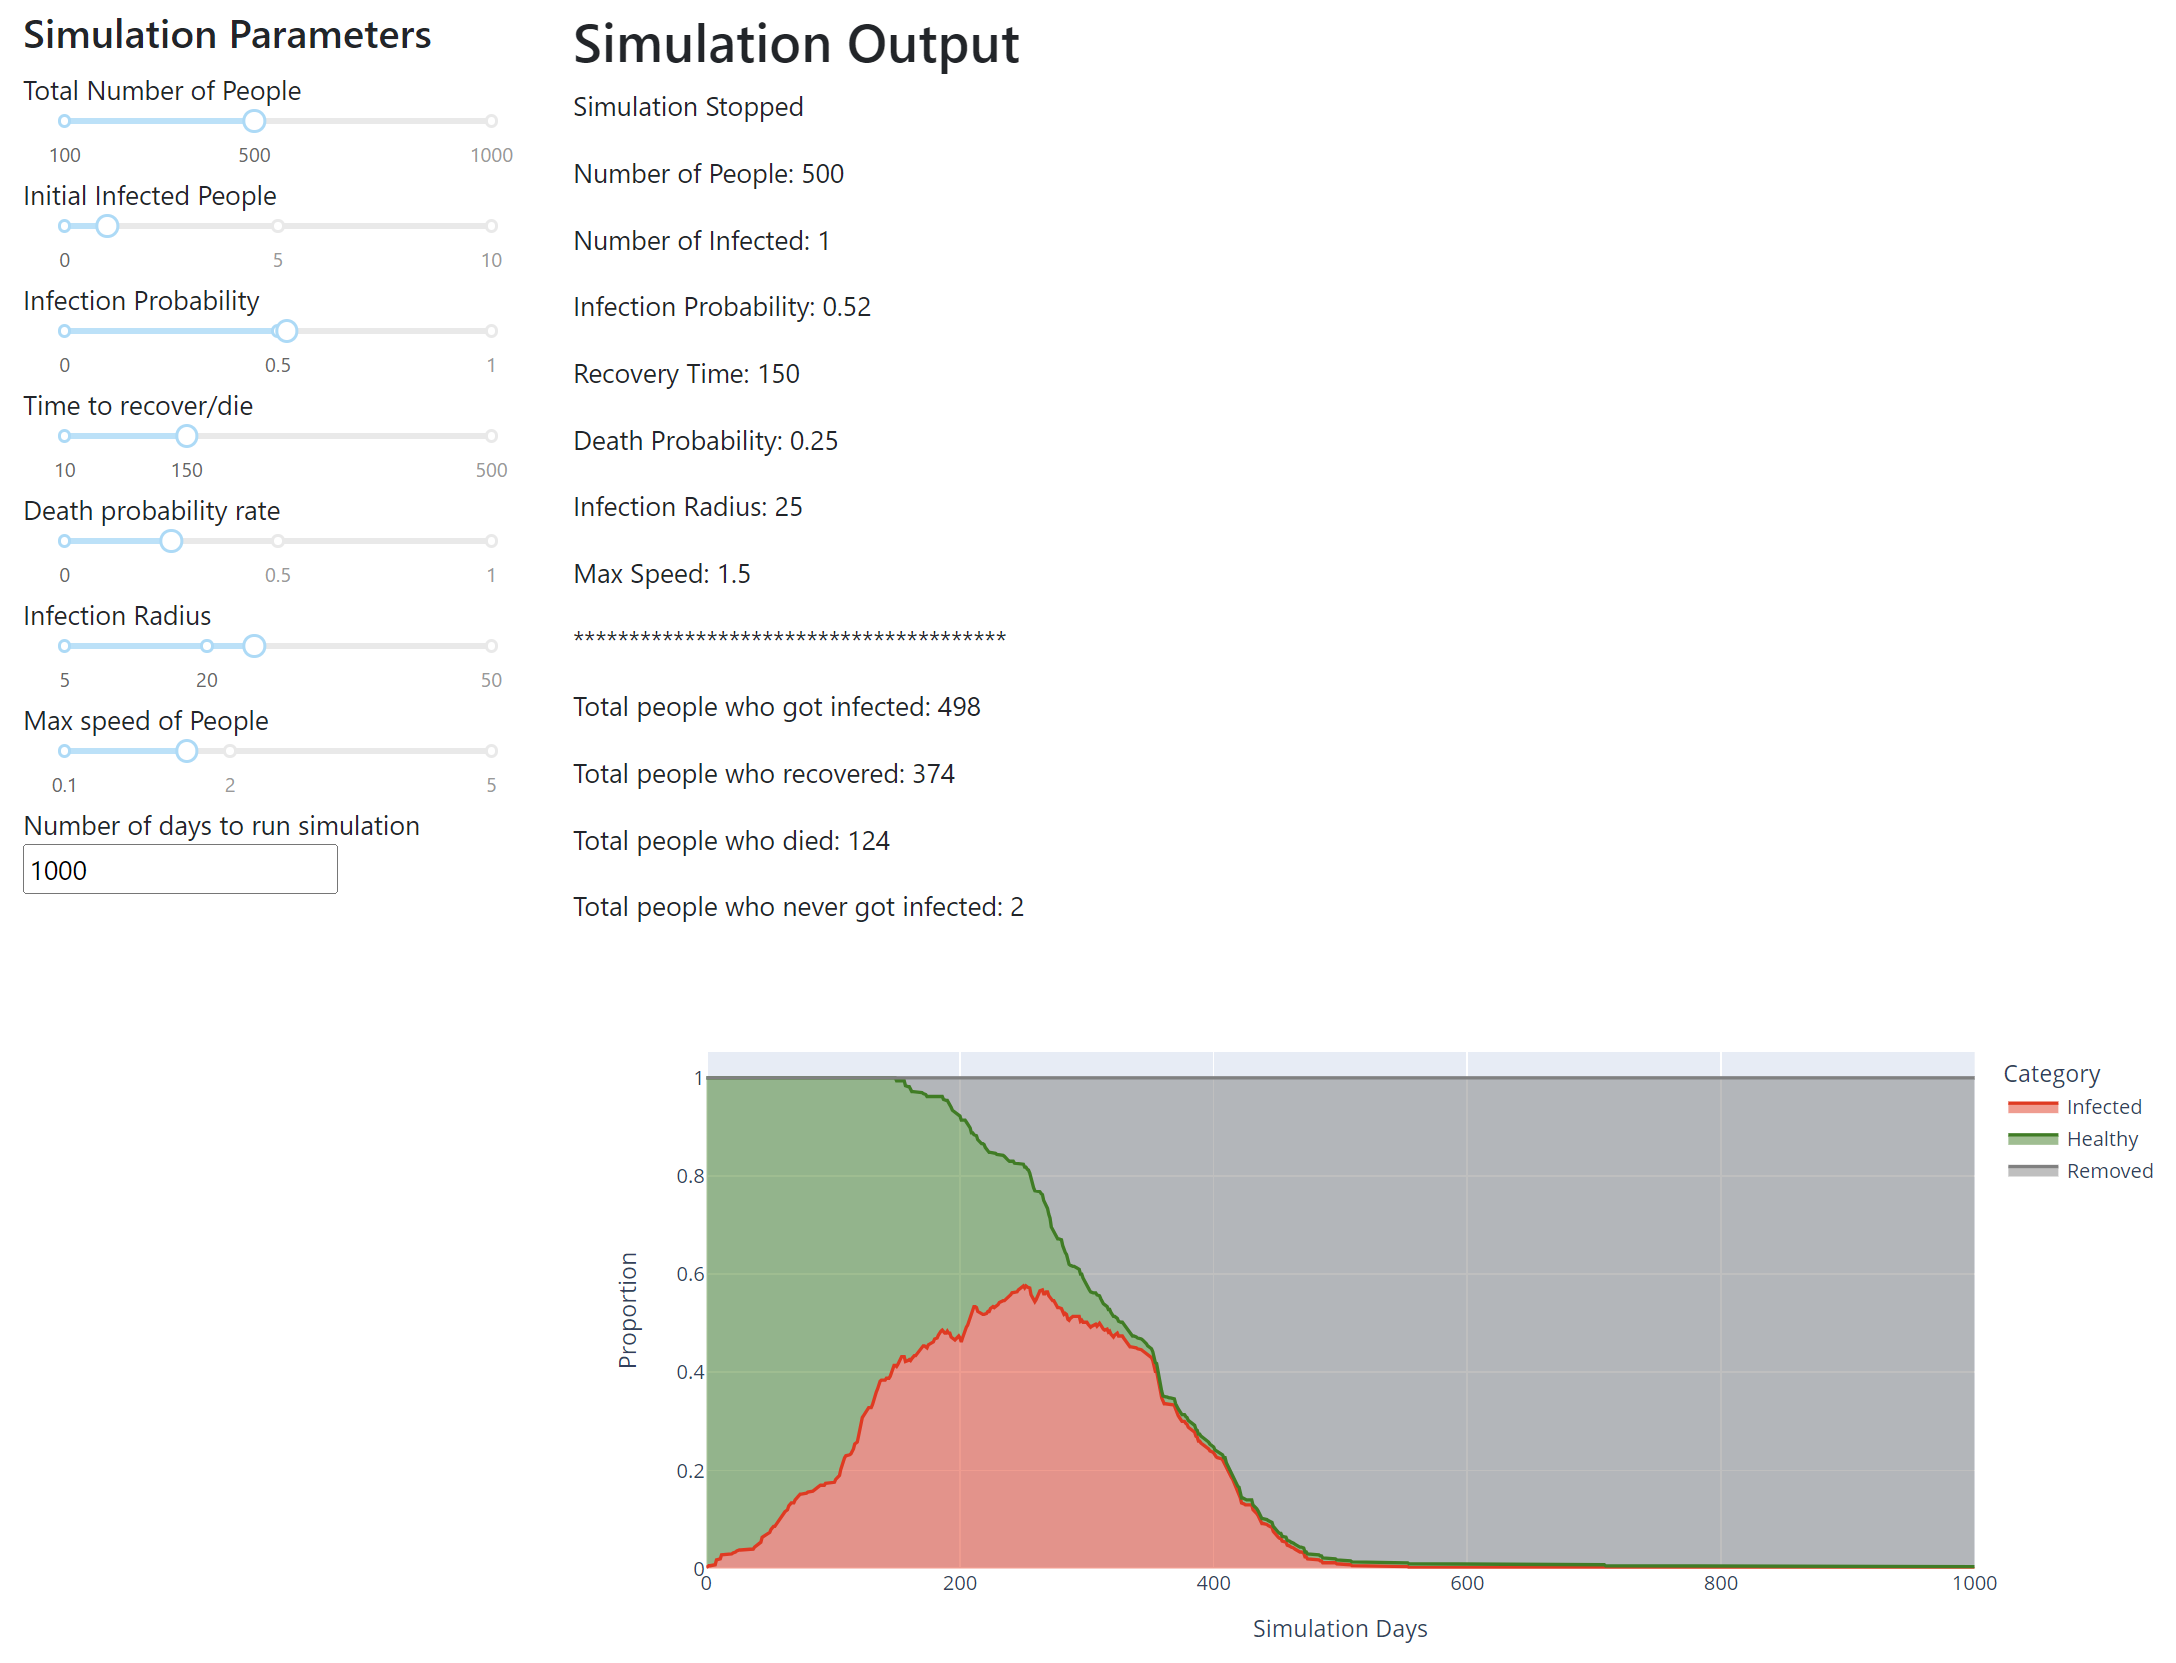
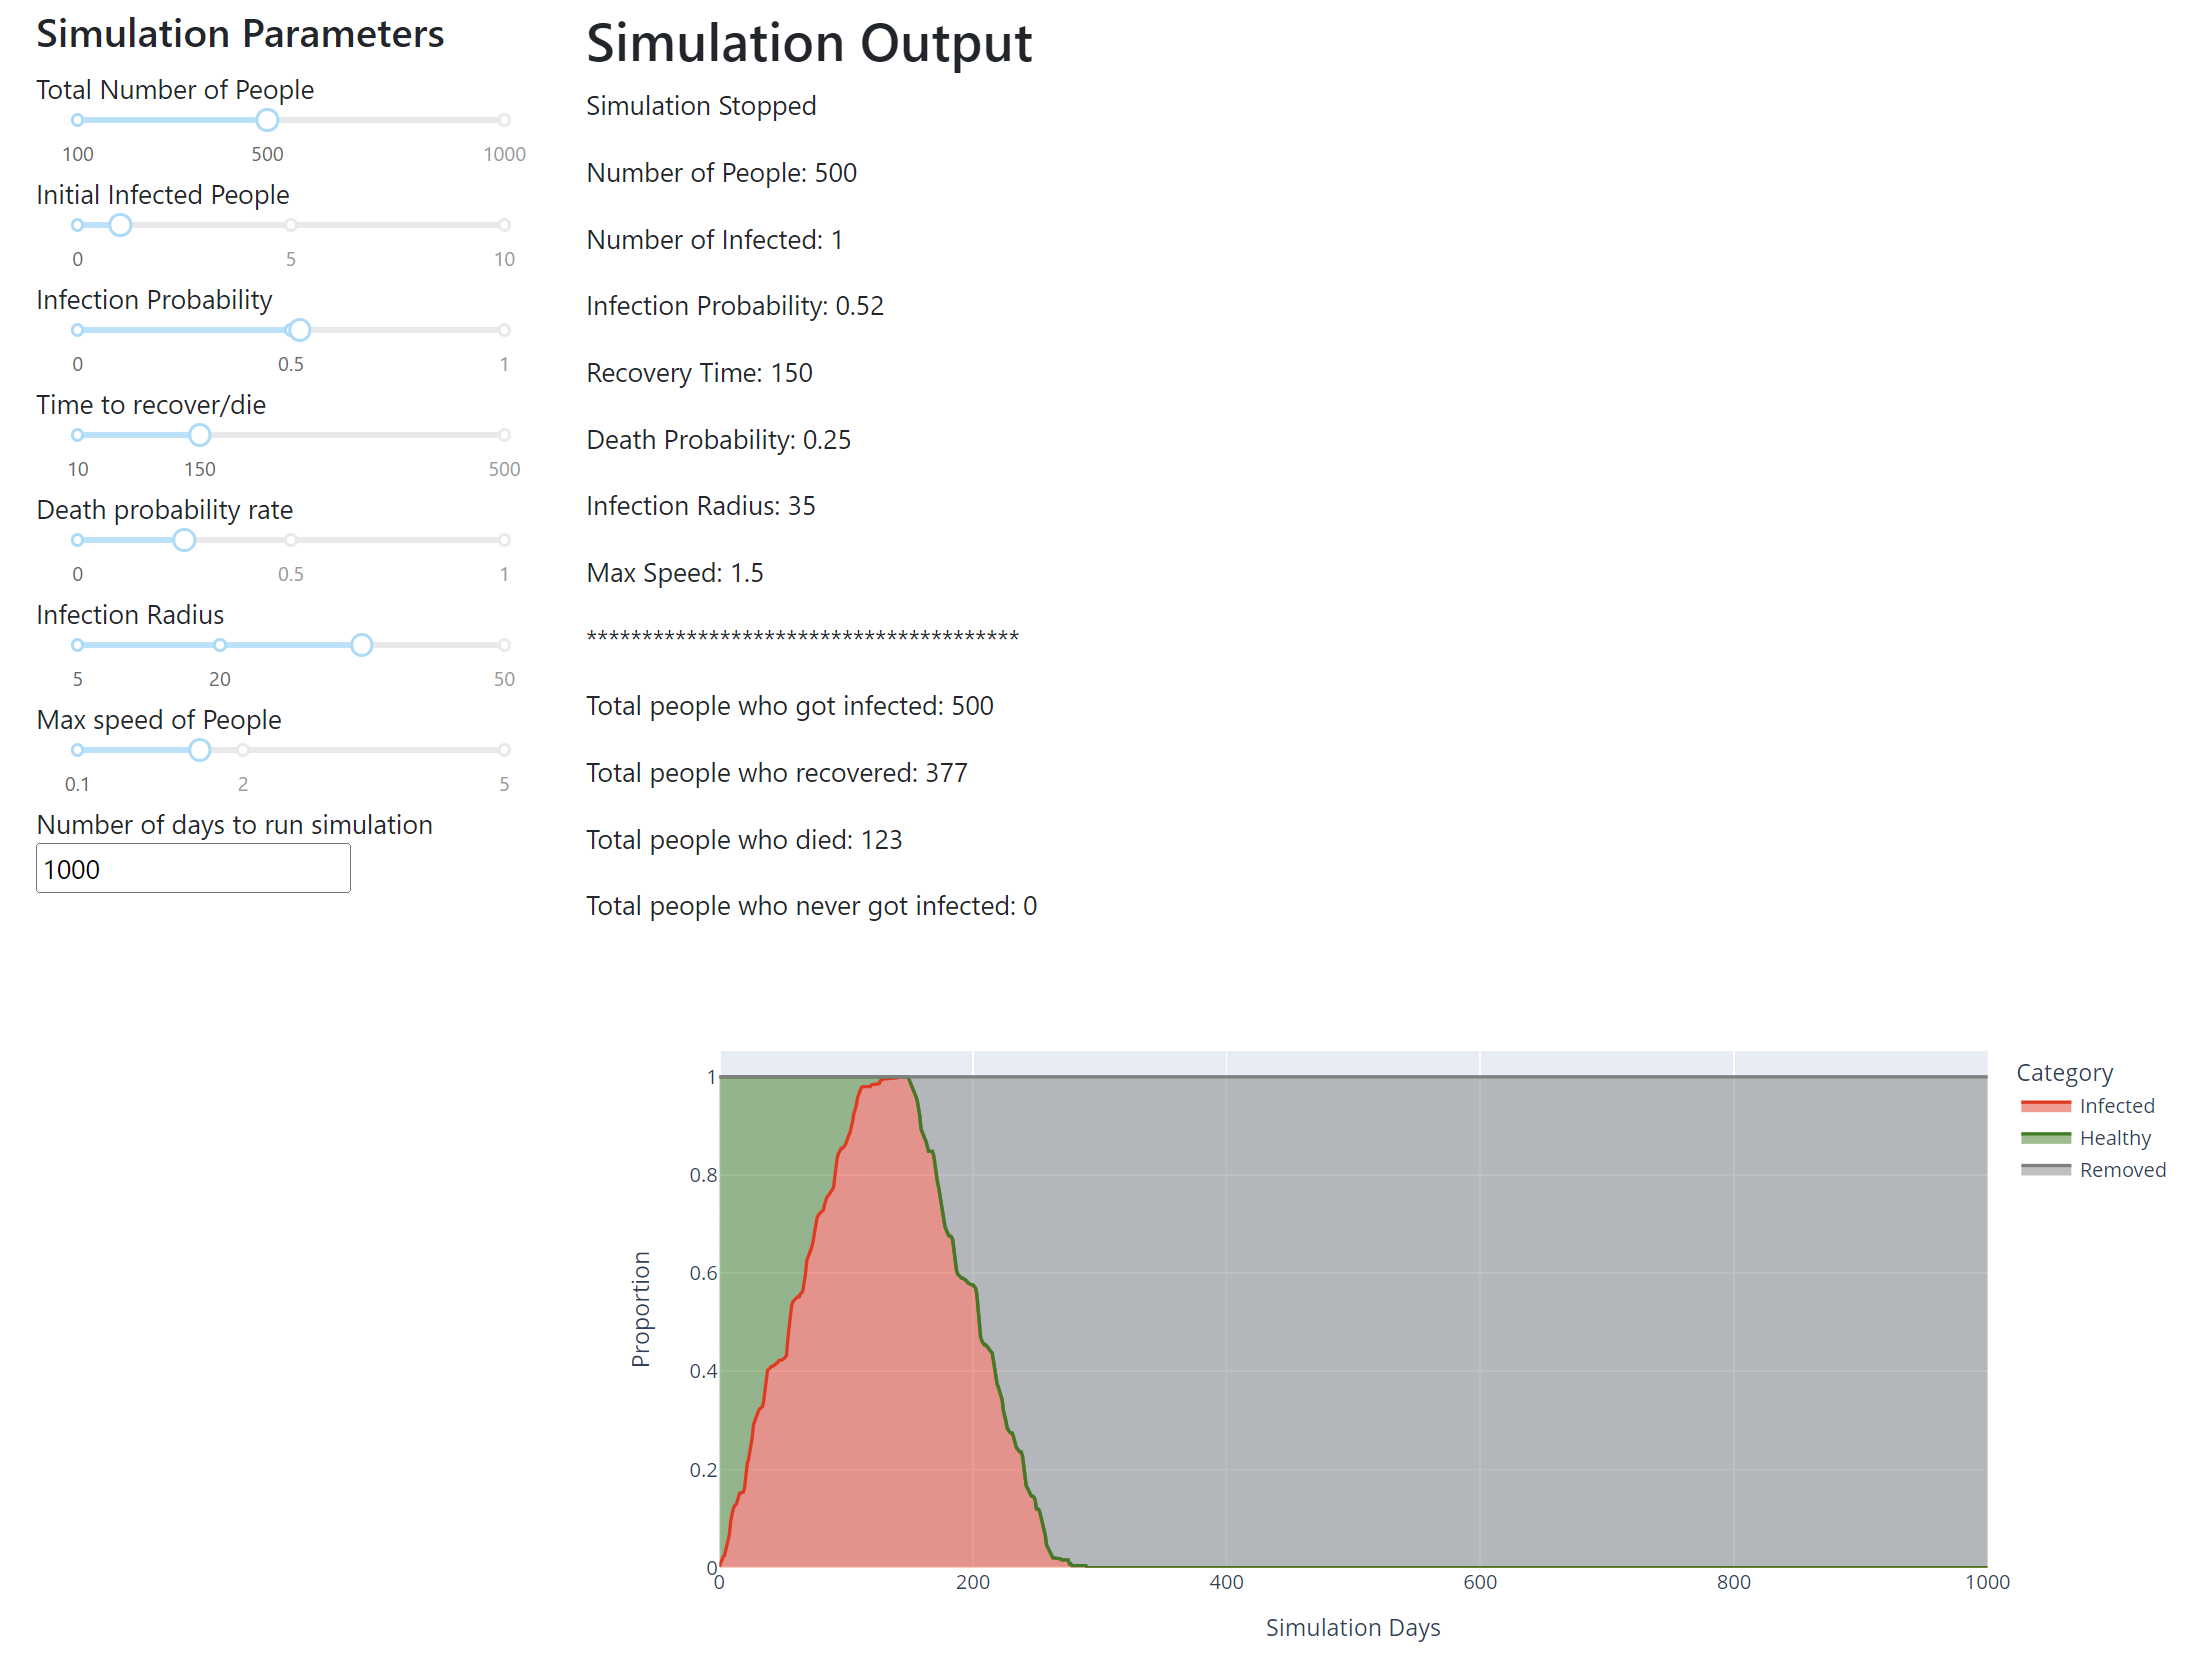
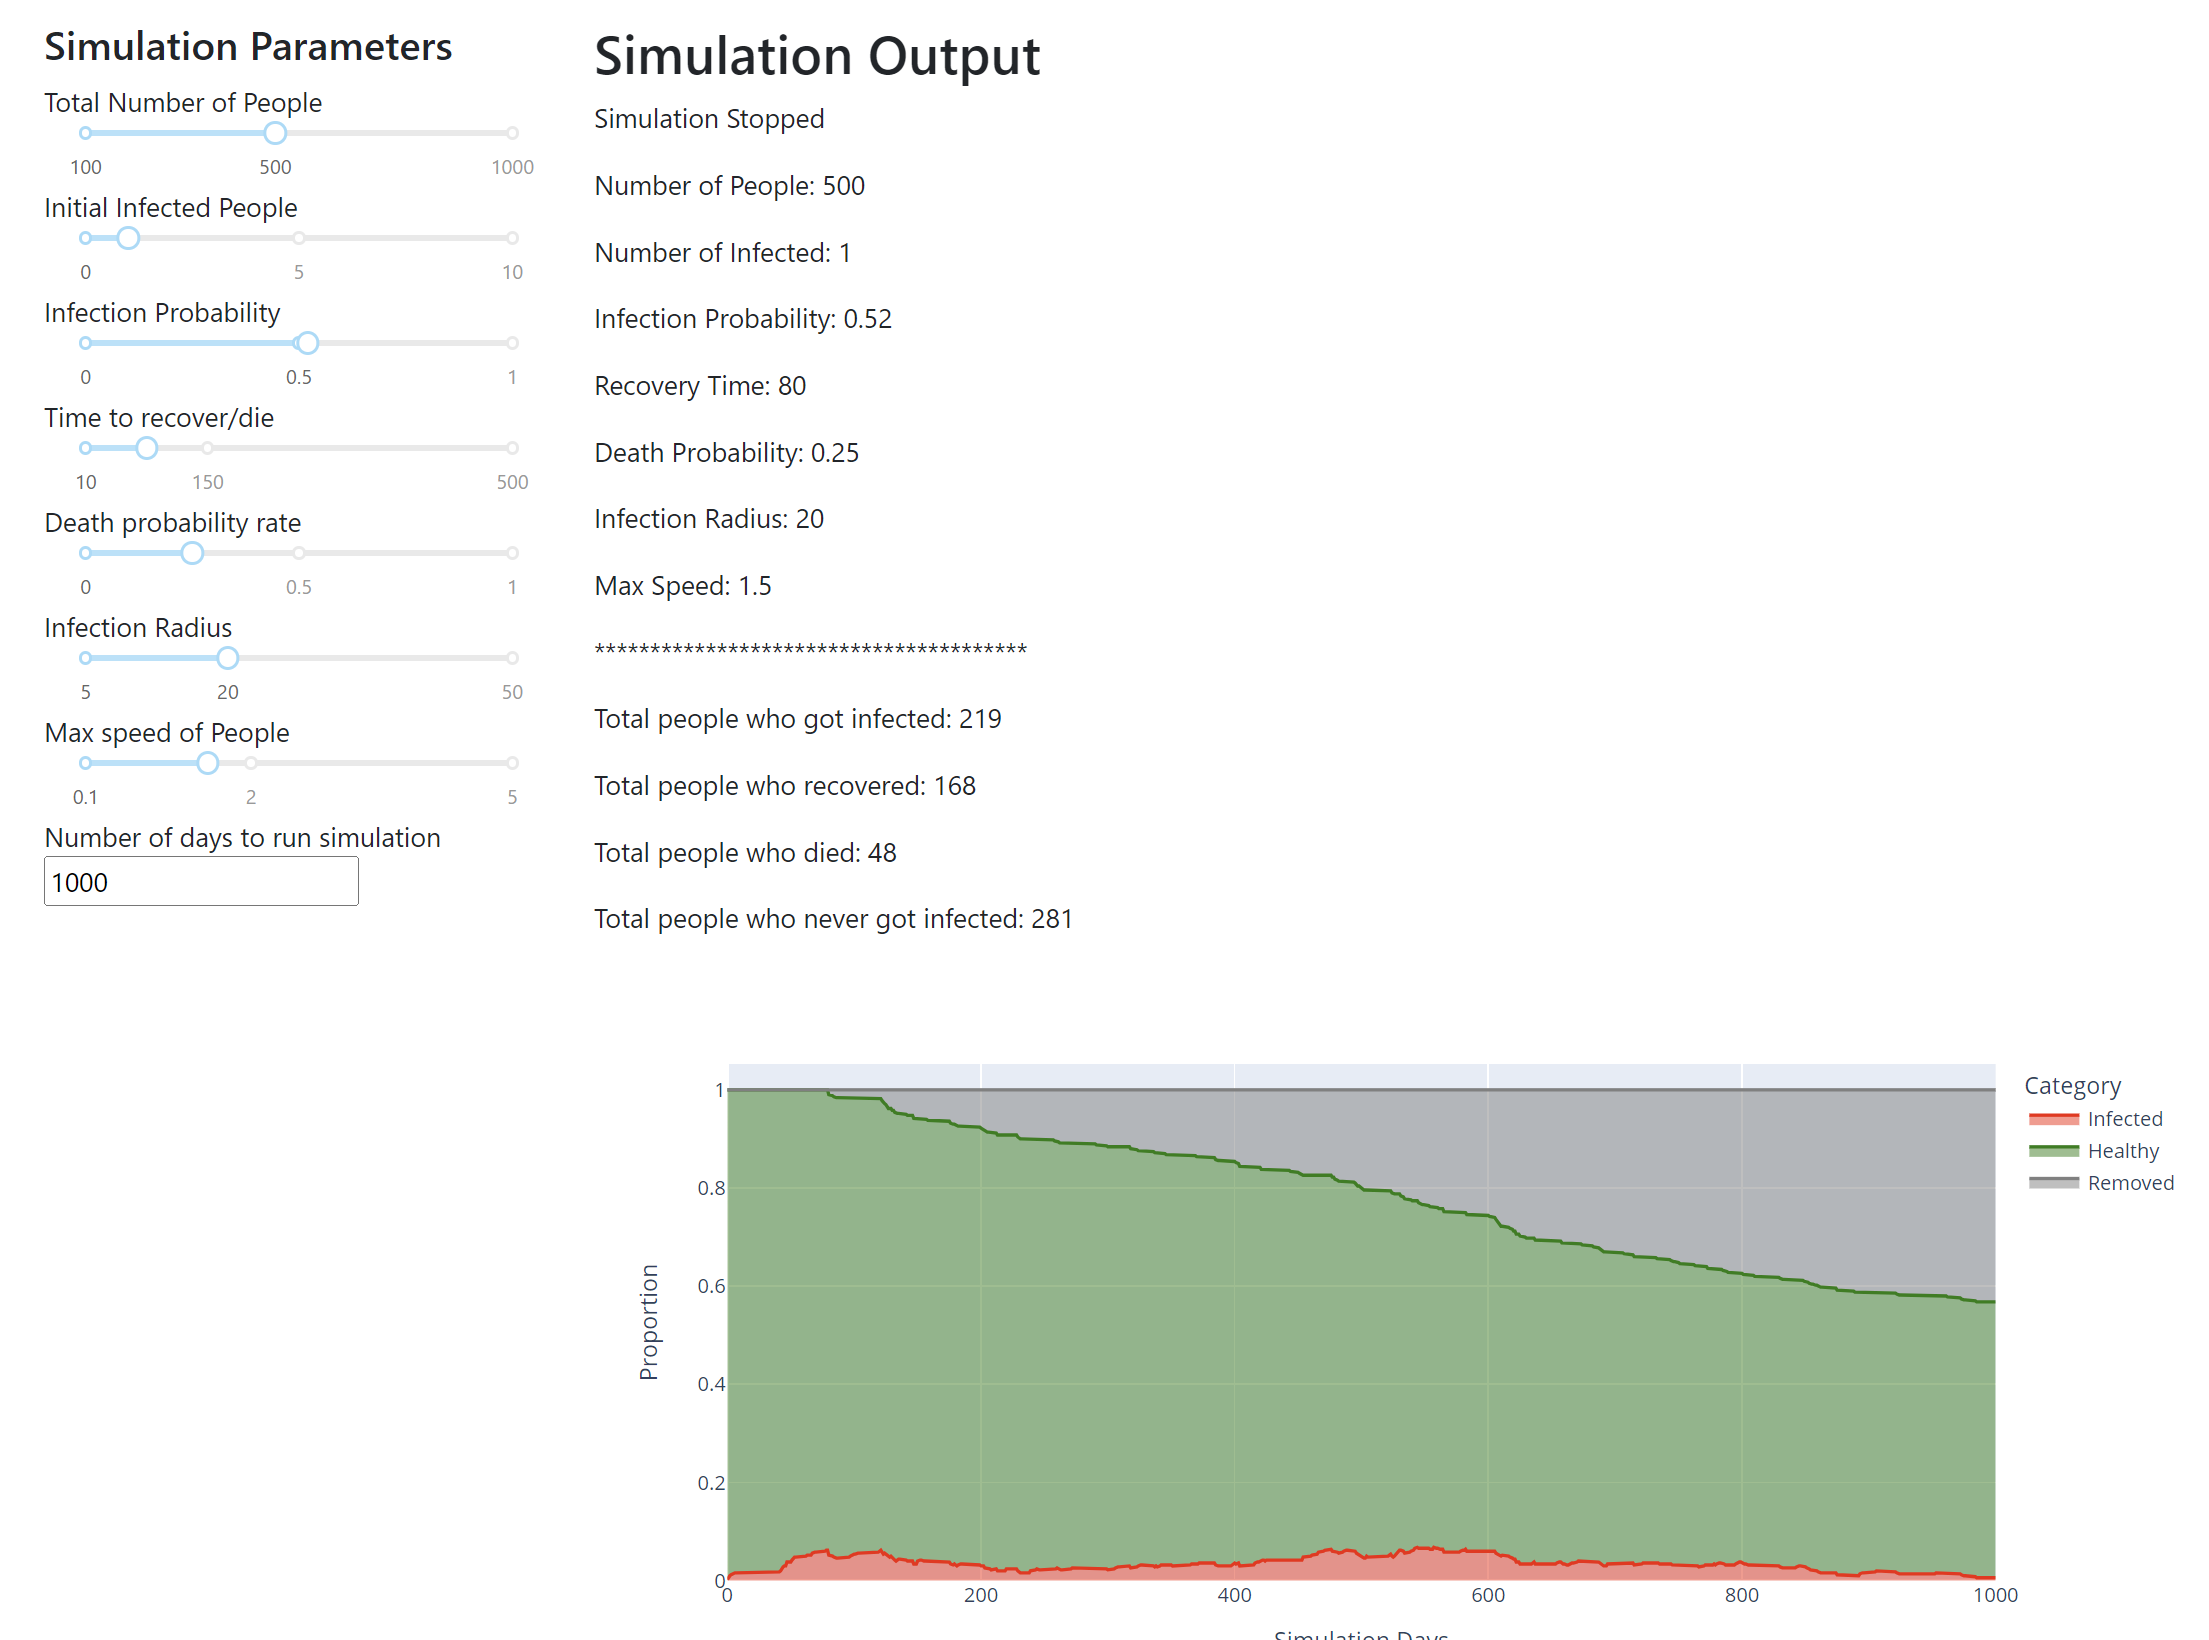
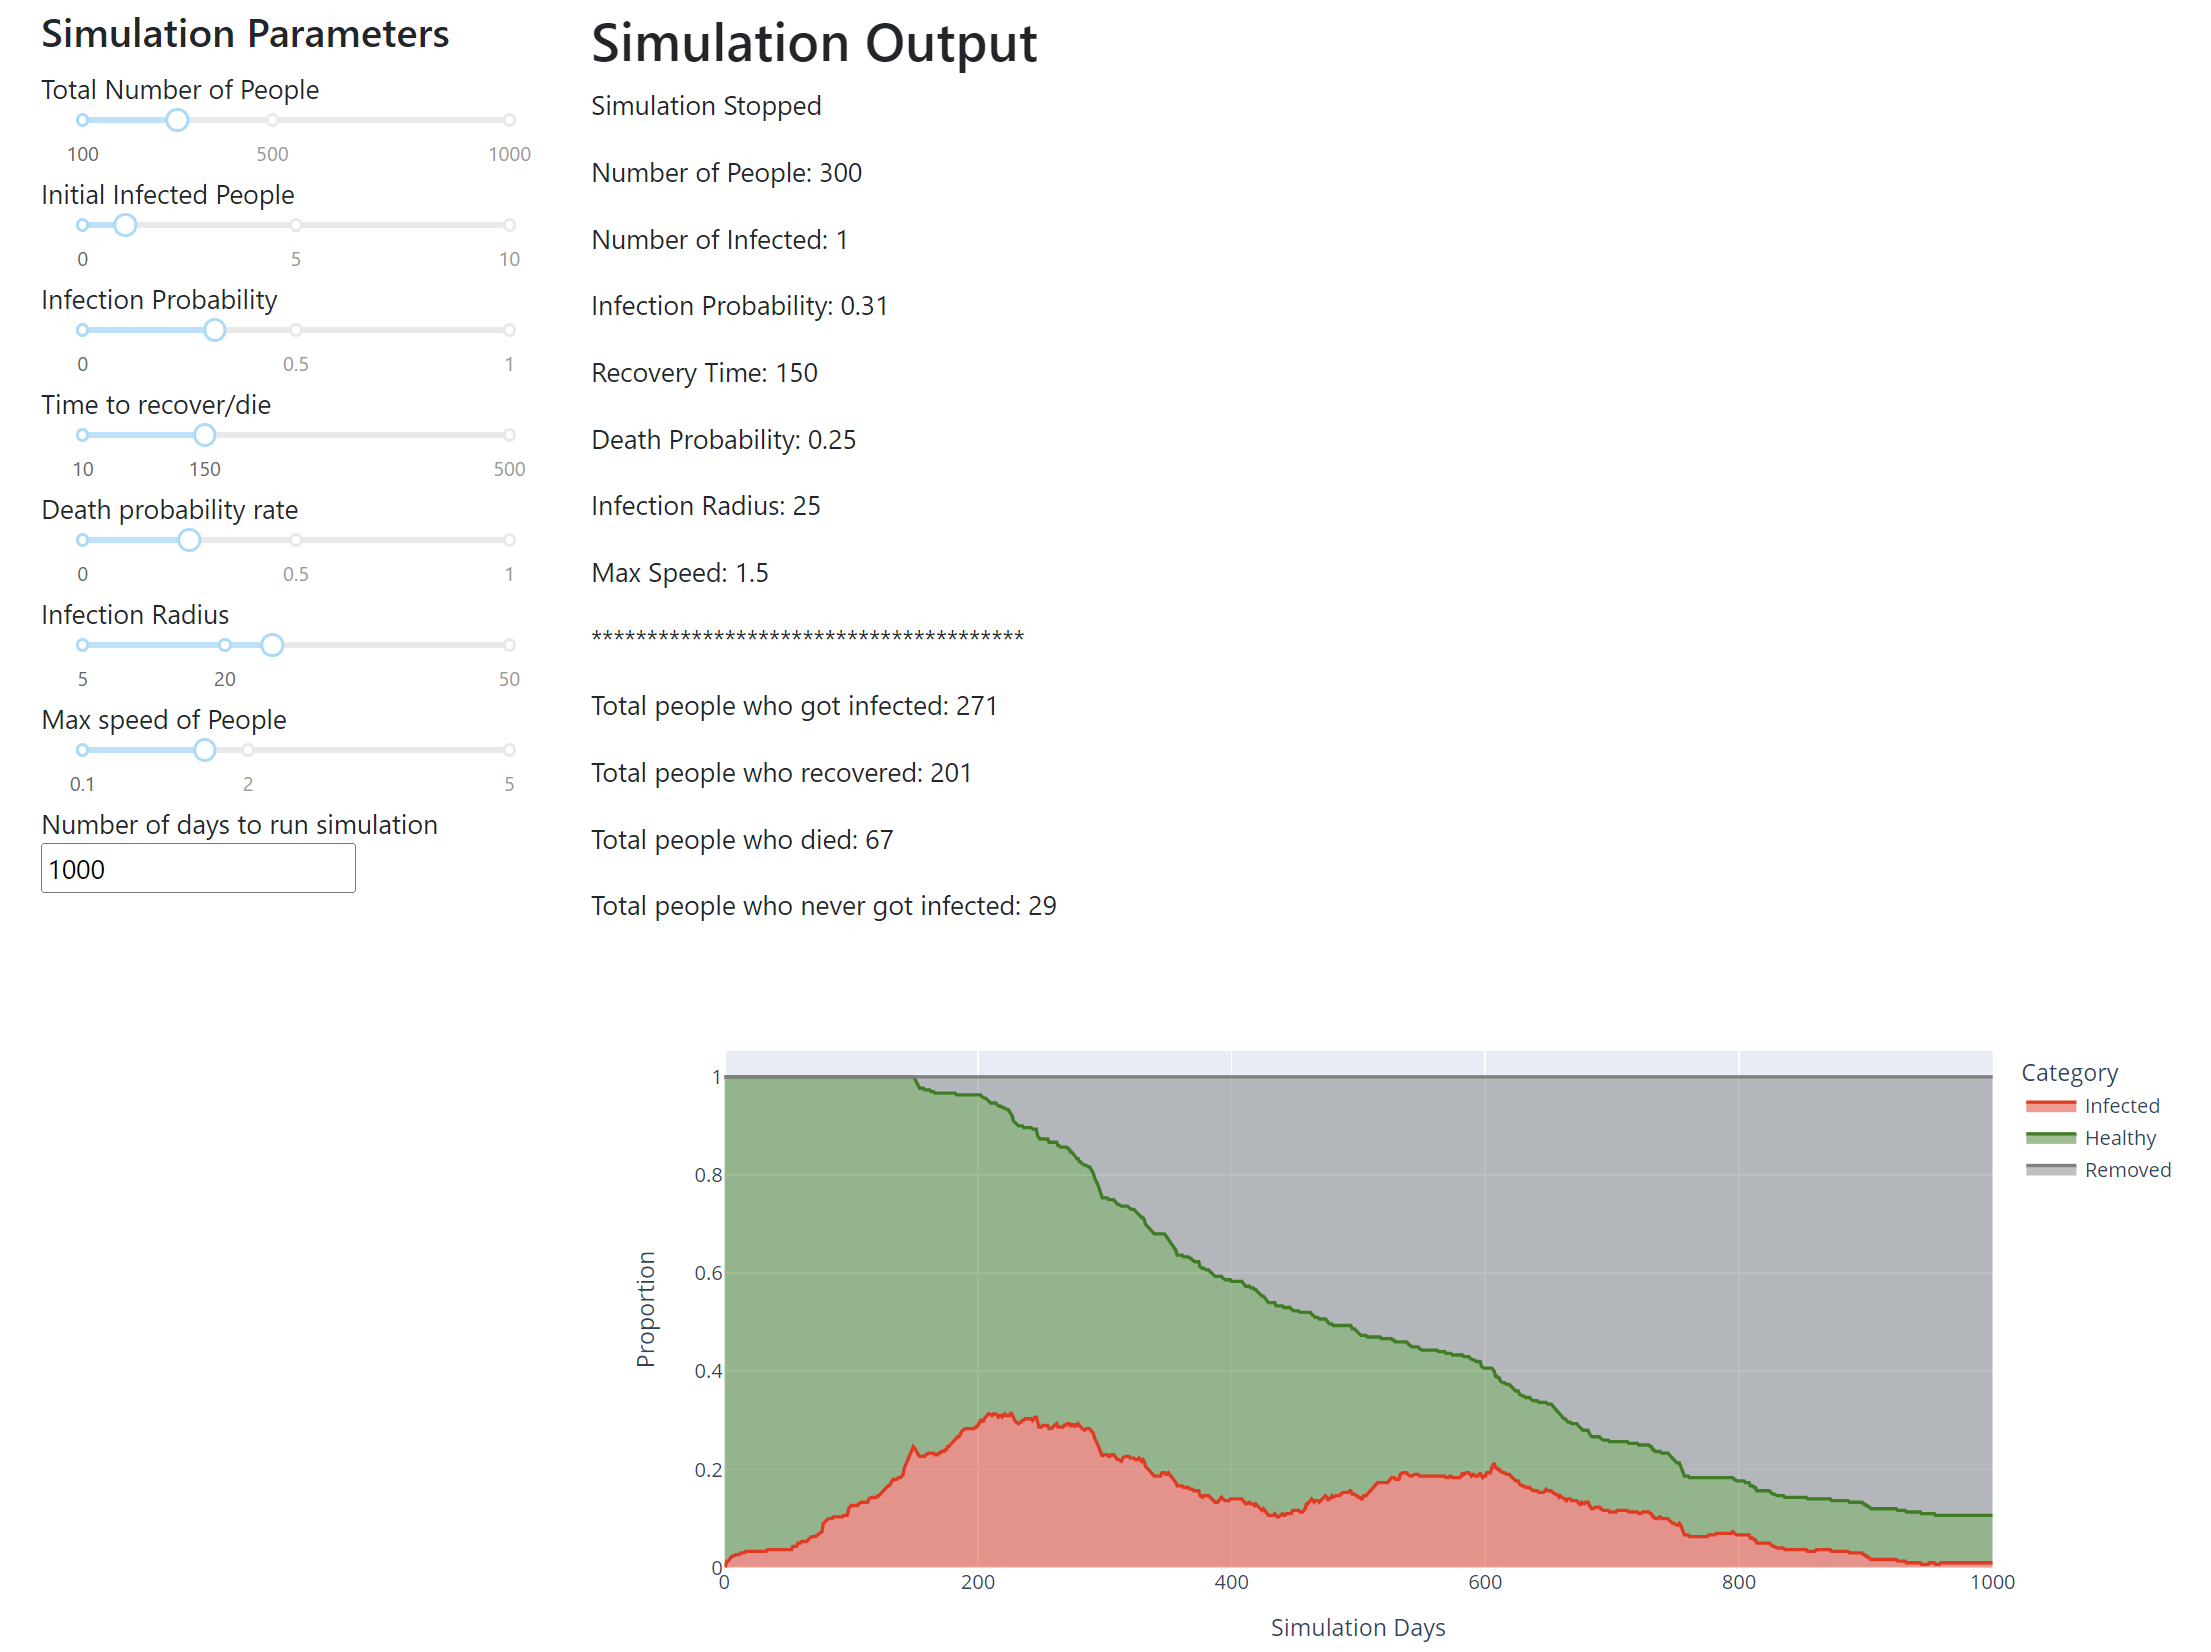

# CODE

### This simulation required anothe python script "simulation3.py" to run. Make sure this file is in the same folder as this Jupyter notebook

In [ ]:
import subprocess
import dash
import dash_bootstrap_components as dbc
import pandas as pd
from dash import dcc, html, Input, Output, State
import plotly.express as px

simulation_process = None

# Define the command to run the simulation script
simulation_command = ["python", "simulation3.py"]

# Define the Dash app
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Define the app layout
app.layout = dbc.Container(
    [
        dbc.Row(
            [
                dbc.Col(
                    [
                        html.H4("Simulation Parameters"),
                        html.Label("Total Number of People"),
                        dcc.Slider(id="num-people-slider", min=100, max=1000, step=100, value=800,
                                   marks={
                                       100: {"label": str(100)},  # First value
                                       500: {"label": str(500)},  # Middle value
                                       1000: {"label": str(1000)},  # Last value
                                   }
                                   ),
                        html.Label("Initial Infected People"),
                        dcc.Slider(id="num-infected-slider", min=0, max=10, step=1, value=1,
                                   marks={
                                       0: {"label": str(0)},  # First value
                                       5: {"label": str(5)},  # Middle value
                                       10: {"label": str(10)},  # Last value
                                   }
                                   ),
                        html.Label("Infection Probability"),
                        dcc.Slider(id="infection-probability-slider", min=0, max=1, step=0.01, value=0.1,
                                   marks={
                                       0: {"label": str(0)},  # First value
                                       0.5: {"label": str(0.5)},  # Middle value
                                       1: {"label": str(1)},  # Last value
                                   }
                                   ),
                        html.Label("Time to recover/die"),
                        dcc.Slider(id="recovery-time-slider", min=10, max=500, step=10, value=150,
                                   marks={
                                       10: {"label": str(10)},  # First value
                                       150: {"label": str(150)},  # Middle value
                                       500: {"label": str(500)},  # Last value
                                   }
                                   ),
                        html.Label("Death probability rate"),
                        dcc.Slider(id="death-probability-slider", min=0, max=1, step=0.05, value=0.25,
                                   marks={
                                       0: {"label": str(0)},  # First value
                                       0.5: {"label": str(0.5)},  # Middle value
                                       1: {"label": str(1)},  # Last value
                                   }
                                   ),
                        html.Label("Infection Radius"),
                        dcc.Slider(id="infection-radius-slider", min=5, max=50, step=5, value=25,
                                   marks={
                                       5: {"label": str(5)},  # First value
                                       20: {"label": str(20)},  # Middle value
                                       50: {"label": str(50)},  # Last value
                                   }
                                   ),
                        html.Label("Max speed of People"),
                        dcc.Slider(id="max-speed-slider", min=0.1, max=5, step=0.1, value=1.5,
                                   marks={
                                       0.1: {"label": str(0.1)},  # First value
                                       2: {"label": str(2)},  # Middle value
                                       5: {"label": str(5)},  # Last value
                                   }
                                   ),
                        html.Label("Number of days to run simulation"),
                        dcc.Input(
                                id='number-days',
                                type='number',
                                value='1000',
                                inputMode='numeric'
                            )
                    ],
                    width=3,
                ),
                dbc.Col(
                    [
                        html.H2("Simulation Output"),
                        html.Div(id="simulation-container"),
                        html.Div(id="selected-values-output"),
                        dcc.Graph(id="plot-output"),
                    ],
                    width=9,
                ),
            ]
        ),
        dbc.Button(" Start ", id="start-button", color="success", className="mr-2 mb-4 rounded", style={"margin-right": "20px", "margin-bottom": "10px"}),
        dbc.Button(" Stop ", id="stop-button", color="danger", className="mr-2 mb-4 rounded",  style={"margin-right": "20px", "margin-bottom": "10px"},disabled=True),
    ],
    className="mt-5",
)

@app.callback(
    Output("simulation-container", "children"),
    Output("start-button", "disabled"),
    Output("stop-button", "disabled"),
    Output("selected-values-output", "children"),
    Output("plot-output", "figure"),
    Input("start-button", "n_clicks"),
    Input("stop-button", "n_clicks"),
    State("num-people-slider", "value"),
    State("num-infected-slider", "value"),
    State("infection-probability-slider", "value"),
    State("recovery-time-slider", "value"),
    State("death-probability-slider", "value"),
    State("infection-radius-slider", "value"),
    State("max-speed-slider", "value"),
    State("number-days", "value"),
    prevent_initial_call=True,
)
def control_simulation(start_button_clicks, stop_button_clicks, num_people, num_infected, infection_probability, recovery_time,
                       death_probability, infection_radius, max_speed, number_days):
    global simulation_process  # Declare the variable as global before assignment
    ctx = dash.callback_context
    if not ctx.triggered:
        return "Simulation not started", False, True, ""

    button_id = ctx.triggered[0]["prop_id"].split(".")[0]

    if button_id == "start-button":
        # Start the simulation script as a subprocess
        simulation_command_with_args = simulation_command + [str(num_people), str(num_infected), str(infection_probability),
                                                             str(recovery_time), str(death_probability),
                                                             str(infection_radius), str(max_speed), str(number_days)]
        simulation_process = subprocess.Popen(simulation_command_with_args)
        return "Simulation is running...",True,False,get_selected_values_text(num_people,
                                     num_infected,
                                     infection_probability,
                                     recovery_time,
                                     death_probability,
                                     infection_radius,
                                     max_speed,
                                     number_days),\
            px.area()

    elif button_id == "stop-button":

        if simulation_process is not None:
            simulation_process.terminate()
            simulation_process = None
            final_results = pd.read_csv('final_results.csv')
            Tdeaths = final_results['deaths']
            Tinfected = final_results['infected']
            Trecovered = final_results['recovered']
            Thealthy = final_results['healthy']

            data = pd.read_csv("proportion_results.csv")

            # Calculate the proportions for each category
            total_counts = data[['Infected', 'Healthy', 'Removed']].sum(axis=1)
            proportions = data[['Infected', 'Healthy', 'Removed']].div(total_counts, axis=0)

            # Reshape the data to long format
            data_long = pd.melt(proportions, ignore_index=False, value_vars=['Infected', 'Healthy', 'Removed'],
                                var_name='Category', value_name='Proportion')

            color_discrete_map = {'Healthy': 'green', 'Infected': 'red', 'Removed': 'gray'}
            fig = px.area(data_long, x=data_long.index, y='Proportion', color='Category',
                          color_discrete_map=color_discrete_map)
            fig.update_xaxes(title_text='Simulation Days')

        return html.Div(
        [
            html.P("Simulation Stopped"),
            # html.H5("Selected Values:"),
            html.P(f"Number of People: {num_people}"),
            html.P(f"Number of Infected: {num_infected}"),
            html.P(f"Infection Probability: {infection_probability}"),
            html.P(f"Recovery Time: {recovery_time}"),
            html.P(f"Death Probability: {death_probability}"),
            html.P(f"Infection Radius: {infection_radius}"),
            html.P(f"Max Speed: {max_speed}"),
            html.P("***************************************"),
            html.P(f"Total people who got infected: {Tinfected[0]}"),
            html.P(f"Total people who recovered: {Trecovered[0]}"),
            html.P(f"Total people who died: {Tdeaths[0]}"),
            html.P(f"Total people who never got infected: {Thealthy[0]}"),
        ]
    ), False, True, "", fig

def get_selected_values_text(num_people, num_infected, infection_probability, recovery_time, death_probability,
                             infection_radius, max_speed, number_days):
    return html.Div(
        [
            html.H5("Selected Values:"),
            html.P(f"Number of People: {num_people}"),
            html.P(f"Number of Infected: {num_infected}"),
            html.P(f"Infection Probability: {infection_probability}"),
            html.P(f"Recovery Time: {recovery_time}"),
            html.P(f"Death Probability: {death_probability}"),
            html.P(f"Infection Radius: {infection_radius}"),
            html.P(f"Max Speed: {max_speed}"),
            html.P(f"Simulation Days: {number_days}"),
            html.H4("Press [STOP] to see results"),
        ]
    )

if __name__ == "__main__":
    app.run_server(port=8001,debug=True, use_reloader=False)

Dash is running on http://127.0.0.1:8001/

 * Serving Flask app '__main__'
 * Debug mode: on
